# Refactoring Trees: An exercise in Research Software Engineering

In this exercise, you will convert badly written code, provided here, into better-written code.

You will do this not through simply writing better code, but by taking a refactoring approach, as discussed in the lectures.

As such, your use of `git` version control, to make a commit after each step of the refactoring, with a commit message which indicates the refactoring you took, will be critical to success.


You will also be asked to look at the performance of your code, and to make changes which improve the speed of the code.

The script as supplied has its parameters hand-coded within the code. You will be expected, in your refactoring, to make these available as command line parameters to be supplied when the code is invoked.

# Some terrible code

Here's our terrible code:

In [1]:
%matplotlib inline

[-0.19866933079506122, 1.9800665778412416, -0.2]
[0.19866933079506122, 1.9800665778412416, 0.2]
[-0.4323203361802515, 2.5327031742429726, -0.4]
[-0.19866933079506122, 2.5800665778412415, 0.0]
[0.19866933079506122, 2.5800665778412415, 0.0]
[0.4323203361802515, 2.5327031742429726, 0.4]
[-0.6355916266024643, 2.829823995610457, -0.6000000000000001]
[-0.5038412952664736, 2.8855271422658197, -0.2]
[-0.27019028988128324, 2.9328905458640886, -0.2]
[-0.1271483717088392, 2.9328905458640886, 0.2]
[0.1271483717088392, 2.9328905458640886, -0.2]
[0.27019028988128324, 2.9328905458640886, 0.2]
[0.5038412952664736, 2.8855271422658197, 0.2]
[0.6355916266024643, 2.829823995610457, 0.6000000000000001]
[-0.7905405422367612, 2.9803126448294446, -0.8]
[-0.7197059885411328, 3.02877317031508, -0.4000000000000001]
[-0.5879556572051421, 3.0844763169704428, -0.4]
[-0.5038412952664736, 3.10152714226582, 0.0]
[-0.35430465181995174, 3.1318397205687116, -0.4]
[-0.27019028988128324, 3.148890545864089, 0.0]
[-0.1271483

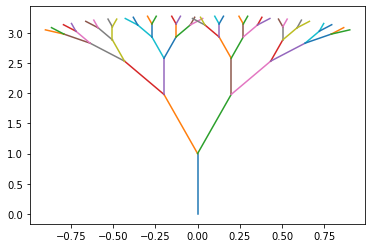

In [33]:
from math import sin, cos
from matplotlib import pyplot as plt
s=1
d=[[0,1,0]]
plt.plot([0,0],[0,1])


for i in range(5):
    n=[]
    for j in range(len(d)):
        n.append([d[j][0]+s*sin(d[j][2]-0.2), d[j][1]+s*cos(d[j][2]-0.2), d[j][2]-0.2])
        print([d[j][0]+s*sin(d[j][2]-0.2), d[j][1]+s*cos(d[j][2]-0.2), d[j][2]-0.2])
        n.append([d[j][0]+s*sin(d[j][2]+0.2), d[j][1]+s*cos(d[j][2]+0.2), d[j][2]+0.2])
        print([d[j][0]+s*sin(d[j][2]+0.2), d[j][1]+s*cos(d[j][2]+0.2), d[j][2]+0.2])
        
        plt.plot([d[j][0], n[-2][0]],[d[j][1], n[-2][1]])
        plt.plot([d[j][0], n[-1][0]],[d[j][1], n[-1][1]])
    d=n
    s*=0.6
plt.savefig('tree.png')

In [35]:
from math import sin, cos
from matplotlib import pyplot as plt

class TreeNode:
    def __init__(self, x, y, direction):
        self._x = x
        self._y = y
        self._direction = direction
    
    @property
    def x(self):
        return self._x
    
    @property
    def y(self):
        return self._y
    
    @property
    def direction(self):
        return self._direction



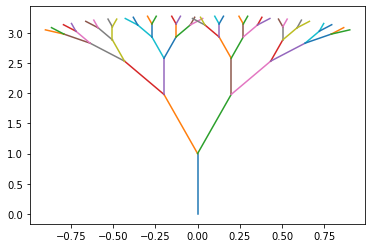

In [37]:
scale=1
origin_node = TreeNode(x = 0, y = 1, direction = 0)
nodes_list=[origin_node]

plt.plot([0,0],[0,1])

number_split = 5

for i in range(number_split):
    n=[]
    for j in range(len(nodes_list)):
        new_x = nodes_list[j].x + scale * sin(nodes_list[j].direction - 0.2)
        new_y = nodes_list[j].y + scale * cos(nodes_list[j].direction - 0.2)
        new_direction = nodes_list[j].direction-0.2
        new_node = TreeNode(new_x, new_y, new_direction)        
        n.append(new_node)

        new_x = nodes_list[j].x + scale * sin(nodes_list[j].direction + 0.2)
        new_y = nodes_list[j].y + scale * cos(nodes_list[j].direction + 0.2)
        new_direction = nodes_list[j].direction+0.2
        new_node_2 = TreeNode(new_x, new_y, new_direction)
        n.append(new_node_2)
        
        plt.plot([nodes_list[j].x, n[-2].x],[nodes_list[j].y, n[-2].y])
        plt.plot([nodes_list[j].x, n[-1].x],[nodes_list[j].y, n[-1].y])
        
    nodes_list=n
    scale *= 0.6
    
plt.savefig('tree.png')

# Rubric and marks scheme

## Part one: Refactoring (15 marks)


* Copy the code above into a file tree.py, invoke it with python tree.py, and verify it creates an image tree.png which looks like that above.
* Initialise your git repository with the raw state of the code. [1 mark]
* Identify a number of simple refactorings which can be used to improve the code, *reducing repetition* and *improving readability*. Implement these one by one, with a git commit each time.
    * 1 mark for each refactoring, 1 mark for each git commit, at least five such: ten marks total.
* Do NOT introduce NumPy or other performance improvements yet (see below.)

* Identify which variables in the code would, more sensibly, be able to be input parameters, and use Argparse to manage these.
   * 4 marks: 1 for each of four arguments identified.

## Part two: performance programming (10 marks)

* For the code as refactored, prepare a figure which plots the time to produce the tree, versus number of iteration steps completed. Your code to produce this figure should run as a script, which you should call perf_plot.py, invoking a function imported from tree.py. The script should produce a figure called perf_plot.png. Comment on your findings in a text file, called comments.md. You should turn off the actual plotting, and run only the mathematical calculation, for your performance measurements. (Add an appropriate flag.)
   * 5 marks: [1] Time to run code identified [1] Figure created [1] Figure correctly formatted [1] Figure auto-generated from script [1] Performance law identified.

* The code above makes use of `append()` which is not appropriate for NumPy. Create a new solution (in a file called tree_np.py) which makes use of NumPy. Compare the performance (again, excluding the plotting from your measurements), and discuss in comments.md
    * 5 marks: [1] NumPy solution uses array-operations to subtract the change angle from all angles in a single minus sign, [1] to take the sine of all angles using np.sin [1] to move on all the positions with a single vector displacement addition [1] Numpy solution uses `hstack` or similar to create new arrays with twice the length, by composing the left-turned array with the right-turned array [1] Performance comparison recorded

As with assignment one, to facilitate semi-automated marking, submit your code to moodle as a single Zip file (not .tgz, nor any other zip format), which unzips to produce files in a folder named with your **student number**.